In [1]:
!pip install -r requirements.txt

In [9]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [109]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)

In [96]:
import matplotlib as mpl
from matplotlib import rc
import matplotlib.font_manager as fm

sns.set(style="whitegrid")
sns.set_color_codes("muted")

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [180]:
raw_df = pd.read_csv('datasets/lyrics_by_year_1964_2023.csv', encoding='utf-8')
df = raw_df.sort_values(by=['year', 'id']).reset_index(drop=True)
df

,id,year,title,singer,lyric,x_rated
0,467355,1964,마도로스 부기,백야성,항구의 일번지 부기우기 일번지\n그라스를 채워다오 부기우기 아가씨\n고동이 슬피울면...,False
1,467498,1964,빨간구두 아가씨,남일해,솔솔솔 오솔길에 빨간구두 아가씨\n똑똑똑 구두소리 어딜 가시나\n한번쯤 뒤돌아 볼만...,False
2,992864,1964,아메리칸 마도로스,고봉산,무역선 오고가는 부산 항구 제2부두\n죄많은 마도로스 이별이 야속트라\n닷줄을 감으...,False
3,1002782,1964,동백아가씨,이미자,헤일 수 없이 수많은 밤을\n내 가슴 도려내는 아픔에 겨워\n얼마나 울었던가 동백아...,False
4,1003023,1964,눈물의 연평도,최숙자,조기를 담뿍잡아\n기폭을 올리고\n온다던 그배는\n어이하여 아니오나\n수평선 바라보...,False
...,...,...,...,...,...,...
4661,36635522,2023,ETA,NewJeans,낭비하지 마 네 시간은 은행\n서둘러서 정리해 걔는 real bad\n받아주면 안돼...,False
4662,36681074,2023,Fast Forward,전소미,I’m your future lover\n타락한 밤 너의 ruler\n영화 속 달콤...,False
4663,36713849,2023,Love Lee,AKMU 악뮤,You know\n내 스타일이 아닌 음악을 들어도\nYou know\n좋아하지 않는...,False
4664,36713850,2023,후라이의 꿈,AKMU 악뮤,저 거위도 벽을 넘어 하늘을 날을 거라고\n달팽이도 넓고 거친 바다 끝에 꿈을 둔다...,False


In [178]:
len(df['singer'].unique()), len(df['id'].unique())

(1312, 4220)

In [6]:
df.sort_values(by='title')

,id,year,title,singer,lyric,x_rated
3573,3947371,2013,물음표 Feat 최자 Of 다이나믹듀오 ZionT,프라이머리,전화를 할까 말까 문자로 할까\n아 시간이 너무 늦었나\n그녀는 벌써 잘까\n오늘따...,False
3563,3947371,2012,물음표 Feat 최자 Of 다이나믹듀오 ZionT,프라이머리,전화를 할까 말까 문자로 할까\n아 시간이 너무 늦었나\n그녀는 벌써 잘까\n오늘따...,False
2112,78184,1998,'Cause I'm Your Girl,SES,Yeah\nwhat's up what's up SES\nWe open up the ...,False
1605,56840,1993,'친구'라 말할 수 있는 건,신성우,나 어릴적 뛰놀던 놀이터에\n회색 건물이 들어서 있고\n길을 걷는 수녀의 옷자락엔\...,False
4322,32399832,2020,0000 Zero O’Clock,방탄소년단,그런 날 있잖아\n이유 없이 슬픈 날\n몸은 무겁고\n나 빼곤 모두 다\n바쁘고 치...,False
...,...,...,...,...,...,...
2967,1459456,2007,흰눈,이루,한 사람을 너무 사랑했던거죠\n얼마나 나를\n아프게 할지도 모르고\n기뻐했죠\n이 ...,False
1237,1079798,1989,히말라야,이브,NaN,False
4410,32998018,2021,힘든 건 사랑이 아니다,임창정,내가 널 떠났어야 했는데 왜 떠나야 하는지도 아는데\n어떤 아무 말도 아무것도 줄 ...,False
4365,32998018,2020,힘든 건 사랑이 아니다,임창정,내가 널 떠났어야 했는데 왜 떠나야 하는지도 아는데\n어떤 아무 말도 아무것도 줄 ...,False


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666 entries, 0 to 4665
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       4666 non-null   int64 
 1   year     4666 non-null   int64 
 2   title    4666 non-null   object
 3   singer   4666 non-null   object
 4   lyric    4458 non-null   object
 5   x_rated  4666 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 186.9+ KB


In [182]:
lyrics_all_df = df.copy()

In [183]:
unique_songs_all = lyrics_all_df.drop_duplicates(subset=['id'])
unique_songs_all

,id,year,title,singer,lyric,x_rated
0,467355,1964,마도로스 부기,백야성,항구의 일번지 부기우기 일번지\n그라스를 채워다오 부기우기 아가씨\n고동이 슬피울면...,False
1,467498,1964,빨간구두 아가씨,남일해,솔솔솔 오솔길에 빨간구두 아가씨\n똑똑똑 구두소리 어딜 가시나\n한번쯤 뒤돌아 볼만...,False
2,992864,1964,아메리칸 마도로스,고봉산,무역선 오고가는 부산 항구 제2부두\n죄많은 마도로스 이별이 야속트라\n닷줄을 감으...,False
3,1002782,1964,동백아가씨,이미자,헤일 수 없이 수많은 밤을\n내 가슴 도려내는 아픔에 겨워\n얼마나 울었던가 동백아...,False
4,1003023,1964,눈물의 연평도,최숙자,조기를 담뿍잡아\n기폭을 올리고\n온다던 그배는\n어이하여 아니오나\n수평선 바라보...,False
...,...,...,...,...,...,...
4661,36635522,2023,ETA,NewJeans,낭비하지 마 네 시간은 은행\n서둘러서 정리해 걔는 real bad\n받아주면 안돼...,False
4662,36681074,2023,Fast Forward,전소미,I’m your future lover\n타락한 밤 너의 ruler\n영화 속 달콤...,False
4663,36713849,2023,Love Lee,AKMU 악뮤,You know\n내 스타일이 아닌 음악을 들어도\nYou know\n좋아하지 않는...,False
4664,36713850,2023,후라이의 꿈,AKMU 악뮤,저 거위도 벽을 넘어 하늘을 날을 거라고\n달팽이도 넓고 거친 바다 끝에 꿈을 둔다...,False


In [184]:
from tqdm.notebook import tqdm

lyrics = unique_songs_all['lyric']
bar = tqdm(total=len(lyrics))
tokens_all = Counter()
for lyric in lyrics:
    if type(lyric) == str:
        tags = [f"{token.form}_{token.tag}" for token in kiwi.tokenize(lyric)]
        tokens_all += Counter(tags)
        del tags
    bar.update(1)

print(tokens_all)

  0%|          | 0/4220 [00:00<?, ?it/s]

Counter({'어_EC': 57050, '나_NP': 38001, 'ᆫ_ETM': 22604, '의_JKG': 21206, '너_NP': 20546, '이_VCP': 17468, 'ᆫ_JX': 17000, '는_ETM': 16105, '에_JKB': 15858, '이_JKS': 15819, '고_EC': 15403, '었_EP': 14956, '하_XSV': 14827, '을_JKO': 14620, 'ᆯ_ETM': 13690, 'ᆯ_JKO': 12498, '가_JKS': 11461, '지_EC': 11204, '사랑_NNG': 11112, '를_JKO': 10637, '도_JX': 10475, '은_ETM': 8911, '게_EC': 8788, '하_XSA': 8425, '는_JX': 8389, '어_EF': 8306, '거_NNB': 8210, '하_VV': 7671, '없_VA': 7548, '은_JX': 7490, '그_MM': 6987, '만_JX': 6821, '수_NNB': 6048, '주_VX': 5999, '것_NNB': 5527, '던_ETM': 5515, 'I_SL': 5451, '그대_NP': 5262, '말_NNG': 5246, '어도_EC': 5075, '보_VX': 4968, '에게_JKB': 4915, '면_EC': 4679, '않_VX': 4531, '우리_NP': 4130, '되_VV': 4107, '하_VX': 4020, '보_VV': 4015, '들_XSN': 3908, '말_VX': 3589, 'you_SL': 3588, '가_VV': 3445, '로_JKB': 3357, '있_VX': 3338, '을_ETM': 3330, '지_VX': 3299, '어서_EC': 3291, '어요_EF': 3285, "'_SS": 3095, '이_MM': 3070, '마음_NNG': 2998, '때_NNG': 2992, '다시_MAG': 2978, '알_VV': 2978, '야_EF': 2921, '있_VA': 2906, '사람_NNG'

```py
"NNG", "NNP", "NNB", "NR", "NP", # 체언 (명사, 수사)
"VV", "VA", "VX", "VCP", "VCN",  # 용언 (동사, 형용사, 보조 용언, 지시사)
"MM", "MAG", "MAJ", # 관형사, 부사
"JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC", # 조사
"EP", "EF", "EC", "ETN", "ETM", # 어미
"XPN", "XSN", "XSV", "XSA", "XSM", "XR", # 접두사, 접미사, 어근
"SF", "SP", "SS", "SSO", "SSC", "SE", "SO", "SW", # 부호, 괄호, 특수 문자
"SL", "SH", "SN", "SB", # 알파벳, 한자, 숫자, 글머리
"UN", # 분석 불가
"W_URL", "W_EMAIL", "W_HASHTAG", "W_MENTION", "W_SERIAL", # 웹 태그
"IC", # 감탄사
"Z_CODA", # 덧붙은 받침
"USER0", "USER1", "USER2", "USER3", "USER4" # 사용자 태그
```

In [185]:
rows = []
for key, count in tokens_all.items():
    k = key.split("_")
    form, tag = k[0], '_'.join(k[1:])
    tag = tag.replace("-I", '').replace("-R", '') # 규칙/불규칙 활용 무시
    rows.append((form, tag, count))

count_df = pd.DataFrame(rows, columns=['form', 'tag', 'count'])
count_df = count_df.sort_values(by=['count', 'tag'], ascending=[False, True])
count_df['form'] = count_df['form'].apply(str.lower)

del rows

count_df

,form,tag,count
8,어,EC,57050
130,나,NP,38001
48,ᆫ,ETM,22604
1,의,JKG,21206
612,너,NP,20546
...,...,...,...
15248,산,XSN,1
17171,인,XSN,1
17325,리,XSN,1
18612,력,XSN,1


In [186]:
tag_sr = count_df['tag']
is_english = tag_sr.isin(["SL"])
is_numeric = tag_sr.isin(["SN"])
is_kanji = tag_sr.isin(["SH"])
is_invalid = tag_sr.isin([
    "UN", # 분석 불가
    "W_URL", "W_EMAIL", "W_HASHTAG", "W_MENTION", "W_SERIAL", # 웹 태그
    "IC", # 감탄사
    "Z_CODA", # 덧붙은 받침
    "USER0", "USER1", "USER2", "USER3", "USER4"
])
is_alpha = tag_sr.isin([
    "NNG", "NNP", "NNB", "NR", "NP", # 체언 (명사, 수사)
    "VV", "VA", "VX", "VCP", "VCN",  # 용언 (동사, 형용사, 보조 용언, 지시사)
    "MM", "MAG", "MAJ", # 관형사, 일반 부사, 접속 부사
    "JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC", # 조사
    "EP", "EF", "EC", "ETN", "ETM", # 어미
    "XPN", "XSN", "XSV", "XSA", "XSM", "XR", # 접두사, 접미사, 어근
])
is_symbol = tag_sr.isin([
    "SF", "SP", "SS", "SSO", "SSC", "SE", "SO", "SW", # 부호, 괄호, 특수 문자
    "SB", # 글머리
    "IC", # 감탄사
])
is_noun = tag_sr.isin([
    "NNG", "NNP", "NNB", "NR", "NP", # 체언 (명사, 수사)
])
is_verb = tag_sr.isin(["VV", "VX"]) # 동사, 보조 용언
is_adjective = tag_sr.isin(["VA"]) # 형용사
is_adverbs = tag_sr.isin(["MM", "MAG", "MAJ"]) # 관형사, 일반 부사, 접속 부사
is_particle = tag_sr.isin(["JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC"]) # 조사

In [187]:
count_df[is_alpha].sort_values('count', ascending=False)

,form,tag,count
8,어,EC,57050
130,나,NP,38001
48,ᆫ,ETM,22604
1,의,JKG,21206
612,너,NP,20546
...,...,...,...
11026,찬스,NNG,1
11022,완젼,NNG,1
11018,탄탄대로,NNG,1
11015,고물,NNG,1


In [188]:
count_df[is_verb].sort_values('count', ascending=False)

,form,tag,count
63,하,VV,7671
265,주,VX,5999
59,보,VX,4968
370,않,VX,4531
459,되,VV,4107
...,...,...,...
10459,내보내,VV,1
10454,쫓아내,VV,1
10278,집어던지,VV,1
10248,고쳐먹,VV,1


In [189]:
count_df[is_noun].sort_values('count', ascending=False)

,form,tag,count
130,나,NP,38001
612,너,NP,20546
80,사랑,NNG,11112
1459,거,NNB,8210
127,수,NNB,6048
...,...,...,...
11535,뱃지,NNG,1
11536,완장,NNG,1
11537,리플,NNG,1
11539,어르신,NNG,1


In [190]:
# save to csv
count_df.to_csv('lyrics_word_count_kiwi.csv', encoding='utf-8', index=False)

In [191]:
!curl https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip -o notosanskr.zip
!unzip -n notosanskr.zip -d notosanskr/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  115M  100  115M    0     0  4599k      0  0:00:25  0:00:24  0:00:01 5511k 0  4397k      0  0:00:26  0:00:20  0:00:06 6150k      0  0:00:25  0:00:25 --:--:-- 5463k
Archive:  notosanskr.zip


In [192]:
count_df[is_noun | is_verb | is_adjective | is_adverbs][['form', 'count']]

,form,count
130,나,38001
612,너,20546
80,사랑,11112
1459,거,8210
63,하,7671
...,...,...
9390,굴,1
9398,만하,1
11402,체하,1
13947,부,1


In [193]:
def get_words_counts(df) -> dict:
    d = df[['form', 'count']]
    d.index = d['form']
    d = d.drop(['form'], axis=1)
    return d.to_dict()['count']

In [194]:
from wordcloud import WordCloud

fonts_dir = "notosanskr"
fonts = list(filter(lambda f: f.endswith(".otf"), os.listdir(fonts_dir)))
fonts = list(map(lambda f: os.path.join(fonts_dir, f), fonts))

In [195]:
def save_word_cloud(filename: str, data: dict, max_font_size=128, width=512, height=512):
    wc = WordCloud(font_path=fonts[0], background_color="white", max_font_size=max_font_size, width=width, height=height)
    cloud = wc.generate_from_frequencies(data)
    cloud.to_file(filename)
    return cloud


In [196]:
df = count_df[is_noun | is_verb | is_adjective | is_adverbs]
save_word_cloud('docs/kword_cloud_kr_all.png', get_words_counts(df))

In [197]:
df = count_df[is_noun]
save_word_cloud('word_cloud_kr_noun.png', get_words_counts(df))

In [198]:
df = count_df[is_verb]
save_word_cloud('word_cloud_kr_verb.png', get_words_counts(df))

In [199]:
df = count_df[is_adjective]
save_word_cloud('word_cloud_kr_adj.png', get_words_counts(df))

In [200]:
df = count_df[is_noun | is_verb]
save_word_cloud('word_cloud_kr_noun+verb.png', get_words_counts(df))

In [201]:
df = count_df[is_english]
save_word_cloud('word_cloud_en.png', get_words_counts(df))

In [202]:
import matplotlib as mpl
from matplotlib import rc
import matplotlib.font_manager as fm

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

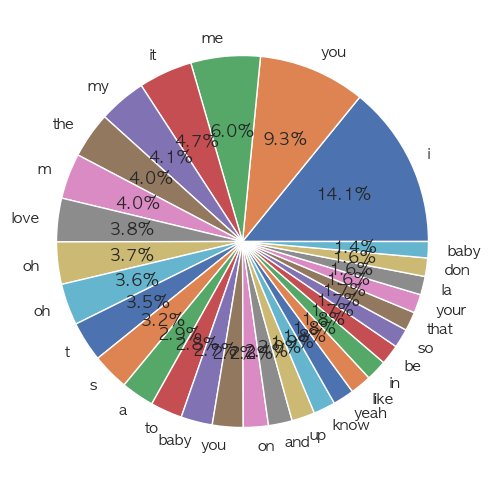

In [203]:
f, ax = plt.subplots(figsize=(6, 15))
limits = 30
en_count_df = count_df[is_english]
samples = en_count_df.iloc[:limits][['count', 'form']]
etc = en_count_df.iloc[limits:]['count'].sum()
# sns.barplot(x='count', y='form', data=en_count_df[['form', 'count']].iloc[:30], ax=ax)
plt.pie(list(samples['count']), labels=list(samples['form']), autopct='%1.1f%%')
plt.show()

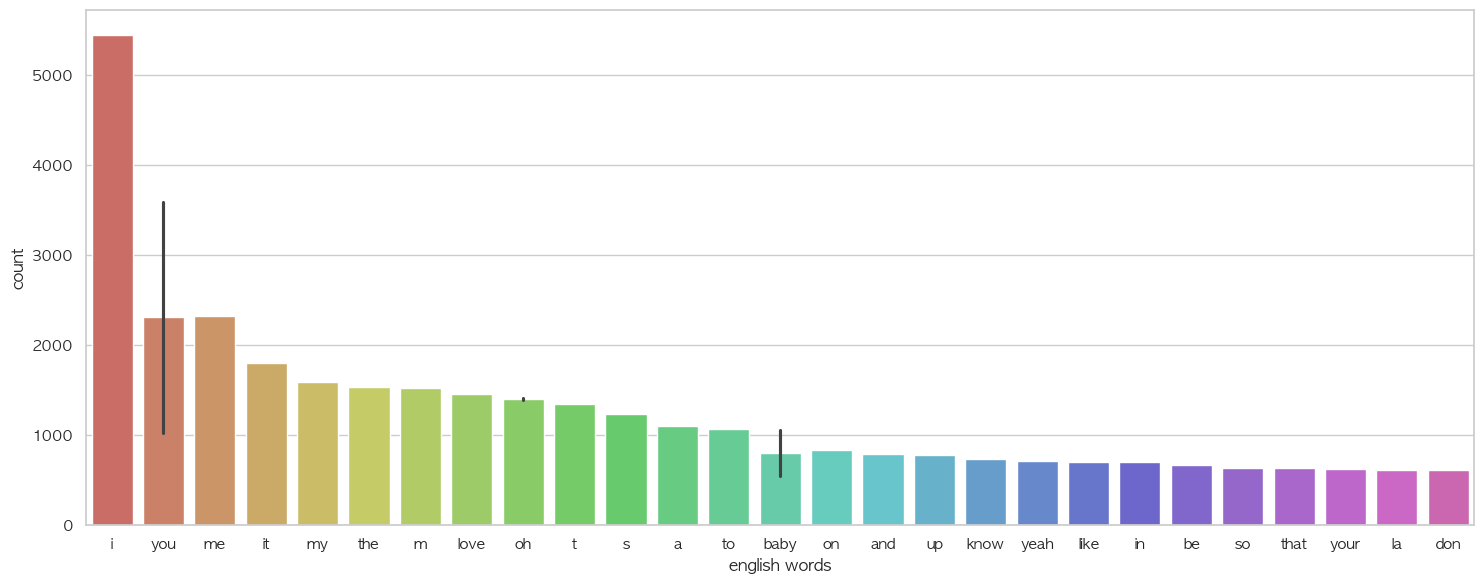

In [204]:
f, ax = plt.subplots(figsize=(15, 6))
limits = 30
df = count_df[is_english].sort_values(by='count', ascending=False).iloc[:limits]
samples = df[['count', 'form']]
sns.barplot(x='form', y='count', data=samples, ax=ax, palette=sns.color_palette("hls", limits))
plt.xlabel('english words')
plt.tight_layout()
plt.show()

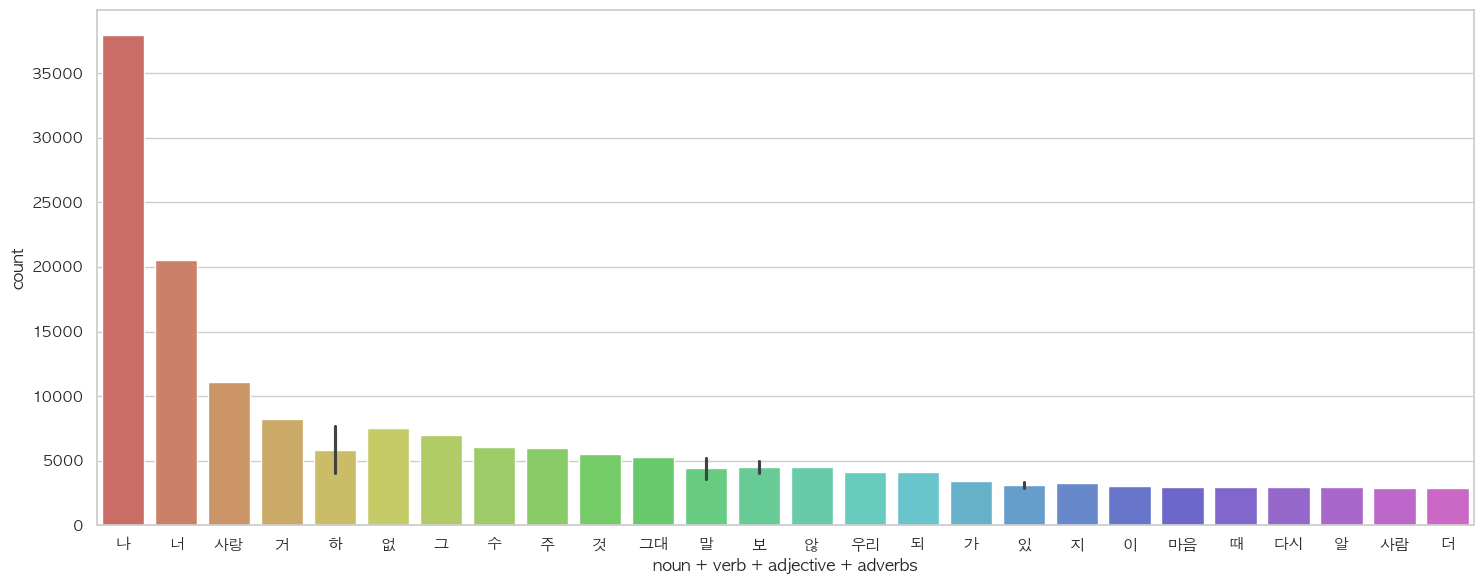

In [205]:
f, ax = plt.subplots(figsize=(15, 6))
limits = 30
df = count_df[is_noun | is_verb | is_adjective | is_adverbs].sort_values(by='count', ascending=False).iloc[:limits]
samples = df[['count', 'form']]
sns.barplot(x='form', y='count', data=samples, ax=ax, palette=sns.color_palette("hls", limits))
# plt.pie(list(samples['count']), labels=list(samples['form']), autopct='%1.1f%%')
plt.xlabel('noun + verb + adjective + adverbs')
plt.tight_layout()
plt.show()

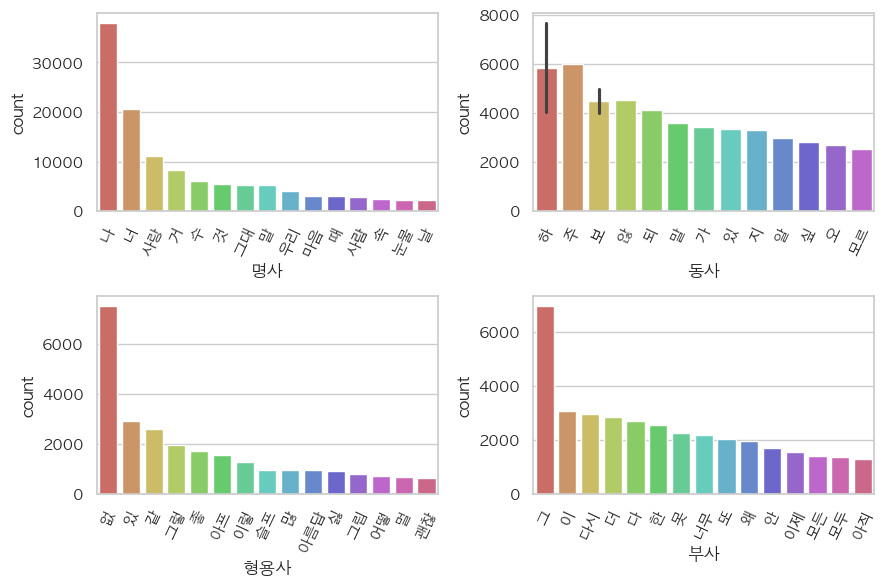

In [213]:
f, axes = plt.subplots(2, 2, figsize=(9, 6))
limits = 15
titles = ["명사", "동사", "형용사", "부사"]
conditions = [is_noun, is_verb, is_adjective, is_adverbs]
for i, (title, cond) in enumerate(zip(titles, conditions)):
    ax = axes[i // 2, i % 2]
    df = count_df[cond].sort_values(by='count', ascending=False).iloc[:limits]
    samples = df[['count', 'form']]
    sns.barplot(x='form', y='count', data=samples, ax=ax, palette=sns.color_palette("hls", limits))
    ax.xaxis.set_tick_params(rotation=65)
    ax.set_xlabel(title)
plt.tight_layout(pad=1)
plt.show()

In [207]:
import numpy as np

kr_alpha_tags = [
    "NNG", "NNP", "NNB", "NR", "NP", # 체언 (명사, 수사)
    "VV", "VA", "VX", "VCP", "VCN",  # 용언 (동사, 형용사, 보조 용언, 지시사)
    "MM", "MAG", "MAJ", # 관형사, 일반 부사, 접속 부사
    "JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC", # 조사
    "EP", "EF", "EC", "ETN", "ETM", # 어미
    "XPN", "XSN", "XSV", "XSA", "XSM", "XR", # 접두사, 접미사, 어근
]

rows = []
years = sorted(lyrics_all_df.year.unique())

for year in tqdm(years):
    df = lyrics_all_df[lyrics_all_df.year == year].copy()
    kr_wc, en_wc, etc = [], [], []
    kr_wc_r, en_wc_r, etc_r = [], [], []
    for l in df['lyric']:
        l = l if type(l) is str else ''
        l = l.replace('\n', ' ').strip()
        tokens = kiwi.tokenize(l)
        total = len(tokens)
        k, e = 0, 0
        for token in tokens:
            tag = str(token.tag).replace('-I', '').replace('-R', '')
            if tag in kr_alpha_tags:
                k += 1
            elif tag == "SL":
                e += 1
        z = total - k - e
        kr_wc.append(k)
        kr_wc_r.append(k / total if total > 0 else 0)
        en_wc.append(e)
        en_wc_r.append(e / total if total > 0 else 0)
        etc.append(z)
        etc_r.append(z / total if total > 0 else 0)
        
    rows.append([
        sum(kr_wc), sum(en_wc), sum(etc),
        np.mean(kr_wc_r), np.mean(en_wc_r), np.mean(etc_r)
    ])

rows = np.array(rows)
print(rows)

  0%|          | 0/60 [00:00<?, ?it/s]

[[1.90700000e+03 0.00000000e+00 2.60000000e+01 8.95807318e-01
  0.00000000e+00 1.32835909e-02]
 [1.07200000e+03 0.00000000e+00 8.00000000e+00 5.84196787e-01
  0.00000000e+00 4.03850758e-03]
 [2.65300000e+03 0.00000000e+00 2.20000000e+01 8.51174595e-01
  0.00000000e+00 5.96826225e-03]
 [4.16700000e+03 0.00000000e+00 4.70000000e+01 8.43163498e-01
  0.00000000e+00 1.04950386e-02]
 [2.73000000e+03 8.00000000e+01 4.70000000e+01 8.96558740e-01
  1.54327689e-02 1.65799195e-02]
 [3.82300000e+03 0.00000000e+00 3.90000000e+01 8.73287851e-01
  0.00000000e+00 9.06509038e-03]
 [2.43400000e+03 0.00000000e+00 2.10000000e+01 7.63233309e-01
  0.00000000e+00 5.99746001e-03]
 [3.11800000e+03 4.20000000e+01 6.30000000e+01 7.88148159e-01
  7.95454545e-03 1.63972953e-02]
 [4.83400000e+03 0.00000000e+00 5.40000000e+01 8.77244945e-01
  0.00000000e+00 9.11869181e-03]
 [5.53500000e+03 0.00000000e+00 7.10000000e+01 8.85767285e-01
  0.00000000e+00 1.16686129e-02]
 [5.13700000e+03 0.00000000e+00 4.00000000e+01 9.1

In [208]:
cnt_df = pd.DataFrame(rows, columns=[
    'kr_words', 'en_words', 'etc_words',
    'kr_words_ratio', 'en_words_ratio', 'etc_words_ratio'
])
cnt_df['year'] = years
for col in ['kr_words', 'en_words', 'etc_words']:
    cnt_df[col] = cnt_df[col].astype(int)
cnt_df = cnt_df[[
    'year',
    'kr_words', 'en_words', 'etc_words',
    'kr_words_ratio', 'en_words_ratio', 'etc_words_ratio'
]]
cnt_df

,year,kr_words,en_words,etc_words,kr_words_ratio,en_words_ratio,etc_words_ratio
0,1964,1907,0,26,0.895807,0.000000,0.013284
1,1965,1072,0,8,0.584197,0.000000,0.004039
2,1966,2653,0,22,0.851175,0.000000,0.005968
3,1967,4167,0,47,0.843163,0.000000,0.010495
4,1968,2730,80,47,0.896559,0.015433,0.016580
5,1969,3823,0,39,0.873288,0.000000,0.009065
6,1970,2434,0,21,0.763233,0.000000,0.005997
7,1971,3118,42,63,0.788148,0.007955,0.016397
8,1972,4834,0,54,0.877245,0.000000,0.009119
9,1973,5535,0,71,0.885767,0.000000,0.011669


In [209]:
ratio_df = cnt_df[['year']].copy()
ratio_df['kr_en'] = cnt_df['kr_words_ratio'] / (cnt_df['kr_words_ratio'] + cnt_df['en_words_ratio'])
ratio_df['en_kr'] = cnt_df['en_words_ratio'] / (cnt_df['kr_words_ratio'] + cnt_df['en_words_ratio'])
ratio_df

,year,kr_en,en_kr
0,1964,1.000000,0.000000
1,1965,1.000000,0.000000
2,1966,1.000000,0.000000
3,1967,1.000000,0.000000
4,1968,0.983078,0.016922
5,1969,1.000000,0.000000
6,1970,1.000000,0.000000
7,1971,0.990008,0.009992
8,1972,1.000000,0.000000
9,1973,1.000000,0.000000


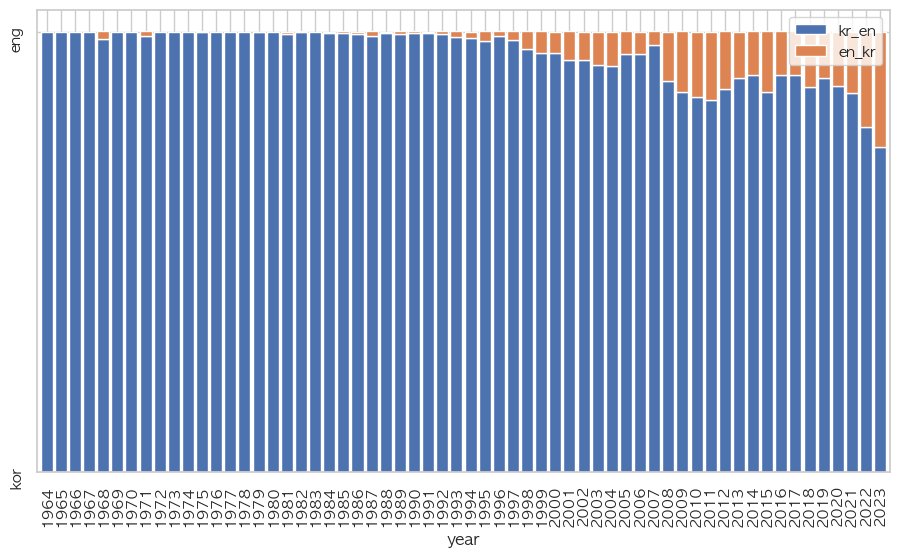

In [210]:
fig, ax = plt.subplots(1, 1, figsize=[11, 6])
df = ratio_df.copy()
ratio_df[['kr_en', 'en_kr']].plot(kind='bar', stacked=True, ax=ax, width=0.85)
plt.xticks(ticks=range(len(df)), labels=ratio_df['year'], rotation=90)
plt.yticks(ticks=[0, 1], labels=['kor', 'eng'], rotation=90)
ax.set_xlabel('year')
plt.show()

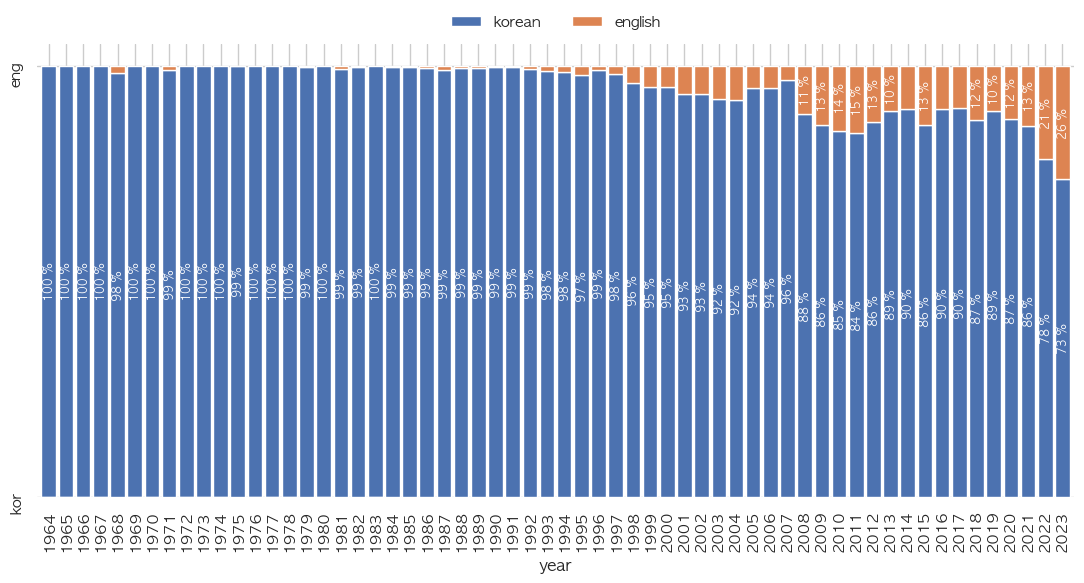

In [211]:
fig, ax = plt.subplots(1, 1, figsize=[11, 6])
x_var, y_var = "kr_en", "en_kr"
df_grouped = ratio_df[[x_var, y_var]]
df_grouped.columns = ['korean', 'english']
df_grouped.plot.bar(stacked=True, width=0.85, ax=ax)
plt.xticks(ticks=range(len(df_grouped)), labels=ratio_df['year'], rotation=90)
plt.yticks(ticks=[0, 1], labels=['kor', 'eng'], rotation=90)
plt.legend(
    bbox_to_anchor=(0.5, 1.02),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=2
)
for ix, row in df_grouped.reset_index(drop=True).iterrows():
    cumulative = 0
    for element in row:
        if element == element and element > 0.1:
            plt.text(
                ix,
                cumulative + element / 2,
                f"{int(element * 100)} %",
                va="center",
                ha="center",
                rotation=90,
                color="white",
                fontsize="x-small",
            )
        cumulative += element
plt.xlabel('year')
# plt.ylabel('korean vs. english')
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()

In [212]:
lyrics_all_df[lyrics_all_df.year == 2017].to_csv('missing_l.csv', encoding='utf-8')